- 2021.07.18  u.k.  visualization of Ca I,II collisional ionization rate coefficient / photoionization cross section

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import numpy as np

import matplotlib.pyplot as plt

In [3]:
%load_ext autoreload
%autoreload 2

from spectra_src.ImportAll import *
#import warnings
#warnings.simplefilter('ignore', UserWarning)
#warnings.simplefilter('ignore', DeprecationWarning)

In [4]:
from spectra_src.Struct import Atom, Atmosphere, Radiation

---

In [125]:
atom.PI.alpha_table_idxs

array([[ 0, 15],
       [15, 35],
       [35, 55],
       [55, 73],
       [73, 91]])

In [119]:
import os

conf_path = os.path.join( CFG._ROOT_DIR, "data/conf/Ca_II.conf" )
atom, wMesh, path_dict = Atom.init_Atom_(conf_path , is_hydrogen=False)

atom.PI.alpha_table[1,0:15] *= 10.
atom.CI.Omega_table[0,:] *= 20.

atmos = Atmosphere.Atmosphere0D(Nh=1.E12, Ne=1.E11, Te=7.E3, Vd=0., Vt=5.E5)
radiation = Radiation.init_Radiation_(atmos, wMesh, 0.5)

array([4.58e-12, 4.58e-12, 4.58e-12, 4.58e-12, 4.58e-12, 4.58e-12])

# Collisional ionization rate coefficient

In [31]:
from spectra_src.Util.AtomicDataUtils import MakeElectronImpactIoniz
from spectra_src.Atomic import Collision

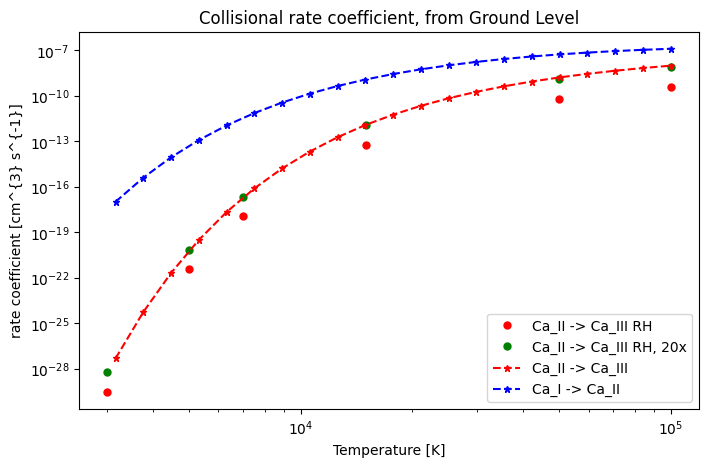

In [99]:
# RH

rate_coes = {}

Te = atom.CI.Te_table
rate_coes["Ca_II -> Ca_III RH"] = (
    Te[:], 
    Collision.CI_rate_coe_(atom.CI.Omega_table[0,:], Te[:], atom.Level["erg"][-1]-atom.Level["erg"][0]),
    "ro",
    )
rate_coes["Ca_II -> Ca_III RH, 20x"] = (
    Te[:], 
    20*Collision.CI_rate_coe_(atom.CI.Omega_table[0,:], Te[:], atom.Level["erg"][-1]-atom.Level["erg"][0]),
    "go",
    )

# A practical fit formula for ionization rate coefficients of atoms and ions by electron impact: Z = 1-28.
# G. S. Voronov (1997, Atomic Data and Nuclear Data Tables, 65, 1).

Te = np.logspace(3.5,5,21)
rate_coes["Ca_II -> Ca_III"] = (
    Te[:], 
    MakeElectronImpactIoniz.v1_rate_coe_(Te[:], 20, 2),
    "r*--",
    )

rate_coes["Ca_I -> Ca_II"] = (
    Te[:], 
    MakeElectronImpactIoniz.v1_rate_coe_(Te[:], 20, 1),
    "b*--",
    )

fig, ax = plt.subplots(1,1, figsize=(8,5), dpi=100)
for key, val in rate_coes.items():
    ax.plot( val[0], val[1], val[2], markersize=5, label=key )
del key, val, Te, rate_coes

ax.legend()
ax.set_title("Collisional rate coefficient, from Ground Level")
ax.set_xlabel("Temperature [K]")
ax.set_ylabel("rate coefficient [cm^{3} s^{-1}]")
ax.set_yscale("log")
ax.set_xscale("log")
plt.show()

---

# Photoionization cross section

In [52]:
from spectra_src.Util.AtomicDataUtils import MakePhotoioniz

In [109]:
op_Ca_II = np.array([[8.615230E-01, 3.892E-01],
          [8.655230E-01, 3.918E-01],
          [8.830079E-01, 3.690E-01],
          [9.008455E-01, 3.475E-01],
          [9.190437E-01, 3.273E-01],
          [9.376100E-01, 3.082E-01],
          [9.565510E-01, 2.903E-01],
          [9.758743E-01, 2.733E-01],
          [9.955879E-01, 2.574E-01],
          [1.015700E+00, 2.424E-01],
          [1.036219E+00, 2.283E-01],
          [1.057152E+00, 2.150E-01],
          [1.078507E+00, 2.025E-01],
          [1.100294E+00, 1.907E-01],
          [1.122522E+00, 1.796E-01],
          [1.145199E+00, 1.691E-01],
          [1.168333E+00, 1.593E-01],
          [1.191936E+00, 1.500E-01],
          [1.216014E+00, 1.413E-01],
          [1.240580E+00, 1.331E-01],
          [1.265640E+00, 1.253E-01],
          [1.291208E+00, 1.180E-01],
          [1.317292E+00, 1.111E-01],
          [1.343903E+00, 1.047E-01],
          [1.371052E+00, 9.857E-02],
          [1.398749E+00, 9.283E-02],
          [1.427005E+00, 8.742E-02],
          [1.455833E+00, 8.233E-02],
          [1.485243E+00, 7.754E-02],
          [1.515246E+00, 7.302E-02],
          [1.545856E+00, 6.877E-02],
          [1.577085E+00, 6.476E-02],
          [1.608944E+00, 6.099E-02],
          [1.641447E+00, 5.744E-02],
          [1.674607E+00, 5.410E-02],
          [1.708436E+00, 5.095E-02],
          [1.742949E+00, 4.798E-02],
          [1.778158E+00, 4.518E-02],
          [1.814080E+00, 4.255E-02],
          [1.850727E+00, 4.007E-02],
          [1.888114E+00, 3.774E-02],
          [1.926256E+00, 3.554E-02],
          [1.965169E+00, 3.347E-02],
          [2.004869E+00, 3.152E-02],
          [2.045369E+00, 2.969E-02],
          [2.086688E+00, 2.796E-02],
          [2.128842E+00, 2.633E-02],
          [2.171848E+00, 2.480E-02],
          [2.215722E+00, 2.335E-02],
          [2.260483E+00, 2.199E-02],
          [2.306148E+00, 2.071E-02],
          [2.352735E+00, 1.951E-02],
          [2.400262E+00, 1.837E-02],
          [2.448751E+00, 1.730E-02],
          [2.498219E+00, 1.629E-02],
          [2.548687E+00, 1.534E-02],
          [2.600173E+00, 1.445E-02],
          [2.652700E+00, 1.361E-02],
          [2.706287E+00, 1.282E-02],
          [2.760960E+00, 1.207E-02],
          [2.816733E+00, 1.137E-02],
          [2.873636E+00, 1.071E-02],
          [2.931686E+00, 1.008E-02],
          [2.990912E+00, 9.495E-03],
          [3.051331E+00, 8.942E-03],
          [3.112973E+00, 8.421E-03],
          [3.175858E+00, 7.931E-03],
          [3.240016E+00, 7.469E-03],
          [3.305467E+00, 7.034E-03],
          [3.372243E+00, 6.624E-03],
          [3.440366E+00, 6.239E-03],
          [3.509867E+00, 5.875E-03],
          [3.580769E+00, 5.533E-03],
          [3.653107E+00, 5.211E-03],
          [3.726903E+00, 4.907E-03],
          [3.802193E+00, 4.622E-03],
          [3.879001E+00, 4.353E-03],
          [3.957363E+00, 4.099E-03],
          [4.037310E+00, 3.860E-03]])

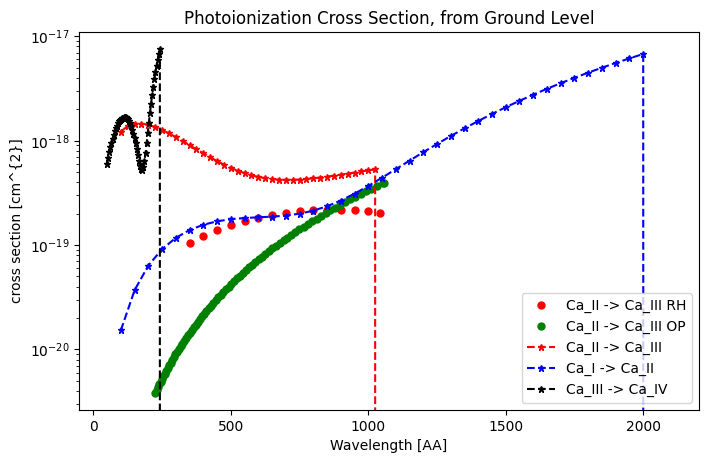

In [117]:
# RH

cross_sections = {}

i1, i2 = atom.PI.alpha_table_idxs[0,:]
wave = atom.PI.alpha_table[0, i1:i2] # [cm]
cross_sections["Ca_II -> Ca_III RH"] = (
    wave[:], 
    atom.PI.alpha_table[1, i1:i2],
    "ro",
    )

# Opacity Project
cross_sections["Ca_II -> Ca_III OP"] = (
    (CST.h_ * CST.c_) / (op_Ca_II[:,0] * CST.E_Rydberg_),
    op_Ca_II[:,1] * 1E-18,
    "go",
    )

# Atomic data for astrophysics. II. New analytic fits for photoionization cross sections of atoms and ions.
# D. A. Verner, G. J. Ferland, K. T. Korista, and D. G. Yakovlev, 1996, ApJ, 465, 487

wave = np.linspace(100,1100,41) * 1E-8
cross_sections["Ca_II -> Ca_III"] = (
    wave[:], 
    MakePhotoioniz.v1_photoioniz_cross_section_(wave[:],20,2),
    "r*--",
    )

wave = np.linspace(100,2100,41) * 1E-8
cross_sections["Ca_I -> Ca_II"] = (
    wave[:], 
    MakePhotoioniz.v1_photoioniz_cross_section_(wave[:],20,1),
    "b*--",
    )

wave = np.linspace(50,250,51) * 1E-8
cross_sections["Ca_III -> Ca_IV"] = (
    wave[:], 
    MakePhotoioniz.v1_photoioniz_cross_section_(wave[:],20,3),
    "k*--",
    )


fig, ax = plt.subplots(1,1, figsize=(8,5), dpi=100)
for key, val in cross_sections.items():
    ax.plot( val[0]*1E8, val[1], val[2], markersize=5, label=key )
del key, val, wave, i1, i2

ax.legend()
ax.set_title("Photoionization Cross Section, from Ground Level")
ax.set_xlabel("Wavelength [AA]")
ax.set_ylabel("cross section [cm^{2}]")
ax.set_yscale("log")
#ax.set_xscale("log")
plt.show()

## Reproducibility

In [113]:
op_Ar_I = np.array([[1.104684E+00, 2.980E+01],
[1.356301E+00, 3.641E+01],
[1.869619E+00, 4.141E+01],
[1.892626E+00, 4.450E+01],
[1.902808E+00, 4.980E+01],
[1.906028E+00, 2.179E+01],
[1.909167E+00, 1.260E+01],
[1.912226E+00, 2.440E+01],
[1.915209E+00, 2.936E+01],
[1.920955E+00, 3.337E+01],
[1.938996E+00, 3.677E+01],
[1.992393E+00, 4.040E+01],
[1.998304E+00, 4.329E+01],
[2.000521E+00, 4.541E+01],
[2.001600E+00, 3.540E+01],
[2.002659E+00, 4.872E+00],
[2.003700E+00, 1.907E+01],
[2.004723E+00, 2.649E+01],
[2.005727E+00, 2.994E+01],
[2.008638E+00, 3.388E+01],
[2.019680E+00, 3.702E+01],
[2.034972E+00, 4.017E+01],
[2.037535E+00, 4.369E+01],
[2.038027E+00, 4.205E+01],
[2.038511E+00, 1.544E+01],
[2.038990E+00, 1.063E+01],
[2.039461E+00, 2.264E+01],
[2.039927E+00, 2.789E+01],
[2.040838E+00, 3.207E+01],
[2.043433E+00, 3.536E+01],
[2.054386E+00, 3.968E+01],
[2.056015E+00, 4.246E+01],
[2.056276E+00, 2.766E+01],
[2.056534E+00, 5.595E+00],
[2.056789E+00, 1.964E+01],
[2.057041E+00, 2.645E+01],
[2.057291E+00, 2.967E+01],
[2.058023E+00, 3.341E+01],
[2.060937E+00, 3.649E+01],
[2.065392E+00, 3.975E+01],
[2.066195E+00, 4.237E+01],
[2.066351E+00, 3.343E+01],
[2.066506E+00, 4.109E+00],
[2.066659E+00, 1.711E+01],
[2.066811E+00, 2.531E+01],
[2.066961E+00, 2.904E+01],
[2.067258E+00, 3.231E+01],
[2.068391E+00, 3.556E+01],
[2.071994E+00, 3.955E+01],
[2.072510E+00, 4.224E+01],
[2.072611E+00, 3.638E+01],
[2.072711E+00, 5.415E+00],
[2.072909E+00, 2.431E+01],
[2.073006E+00, 2.851E+01],
[2.073199E+00, 3.207E+01],
[2.073850E+00, 3.527E+01],
[2.076344E+00, 3.941E+01],
[2.076696E+00, 4.212E+01],
[2.076764E+00, 3.809E+01],
[2.076833E+00, 8.545E+00],
[2.076900E+00, 1.276E+01],
[2.076968E+00, 2.338E+01],
[2.077034E+00, 2.804E+01],
[2.077167E+00, 3.187E+01],
[2.077552E+00, 3.496E+01],
[2.079361E+00, 3.930E+01],
[2.079611E+00, 4.201E+01],
[2.079660E+00, 3.919E+01],
[2.079709E+00, 1.262E+01],
[2.079757E+00, 1.077E+01],
[2.079805E+00, 2.247E+01],
[2.079853E+00, 2.760E+01],
[2.079947E+00, 3.170E+01],
[2.080224E+00, 3.490E+01],
[2.081076E+00, 3.723E+01],
[2.081094E+00, 3.532E+01],
[2.528333E+00, 2.499E+01],
[3.005321E+00, 1.195E+01],
[3.104694E+00, 9.748E+00],
[3.167414E+00, 9.180E+00],
[3.231399E+00, 8.646E+00],
[3.296677E+00, 8.142E+00],
[3.363276E+00, 7.668E+00],
[3.431218E+00, 7.221E+00],
[3.500532E+00, 6.801E+00],
[3.571247E+00, 6.405E+00],
[3.643391E+00, 6.032E+00],
[3.716992E+00, 5.681E+00],
[3.792083E+00, 5.350E+00],
[3.868687E+00, 5.038E+00],
[3.946838E+00, 4.745E+00],
[4.026572E+00, 4.469E+00],
[4.107913E+00, 4.208E+00],
[4.190897E+00, 3.963E+00],
[4.275560E+00, 3.732E+00],
[4.361932E+00, 3.515E+00],
[4.450049E+00, 3.310E+00],
[4.539945E+00, 3.118E+00],
[4.631660E+00, 2.936E+00],
[4.725224E+00, 2.765E+00],
[4.820680E+00, 2.604E+00],
[4.918065E+00, 2.452E+00],
[5.017417E+00, 2.310E+00],
[5.118773E+00, 2.175E+00],
[5.222182E+00, 2.048E+00],
[5.327678E+00, 1.929E+00],
[5.435302E+00, 1.817E+00],
[5.545103E+00, 1.711E+00],
[5.657122E+00, 1.611E+00],
[5.771402E+00, 1.517E+00],
[5.887992E+00, 1.429E+00],
[6.006939E+00, 1.346E+00],
[6.128287E+00, 1.268E+00],
[6.252087E+00, 1.194E+00],
[6.378386E+00, 1.124E+00],
[6.507239E+00, 1.059E+00],
[6.638693E+00, 9.971E-01],
[6.772802E+00, 9.390E-01],
[6.909624E+00, 8.843E-01],
[7.049206E+00, 8.328E-01],
[7.191611E+00, 7.843E-01],
[7.336889E+00, 7.386E-01],
[7.485105E+00, 6.956E-01],
[7.636316E+00, 6.551E-01],
[7.790580E+00, 6.170E-01],
[7.947959E+00, 5.810E-01],
[8.108519E+00, 5.472E-01],
[8.272323E+00, 5.153E-01],
[8.439433E+00, 4.853E-01],
[8.609918E+00, 4.571E-01],
[8.783854E+00, 4.304E-01],
[8.961295E+00, 4.054E-01],
[9.142328E+00, 3.818E-01],
[9.327013E+00, 3.595E-01],
[9.515433E+00, 3.386E-01],
[9.707653E+00, 3.189E-01],
[9.903766E+00, 3.003E-01],
[1.010383E+01, 2.828E-01],
[1.030795E+01, 2.664E-01],
[1.051617E+01, 2.508E-01],
[1.072862E+01, 2.362E-01],])

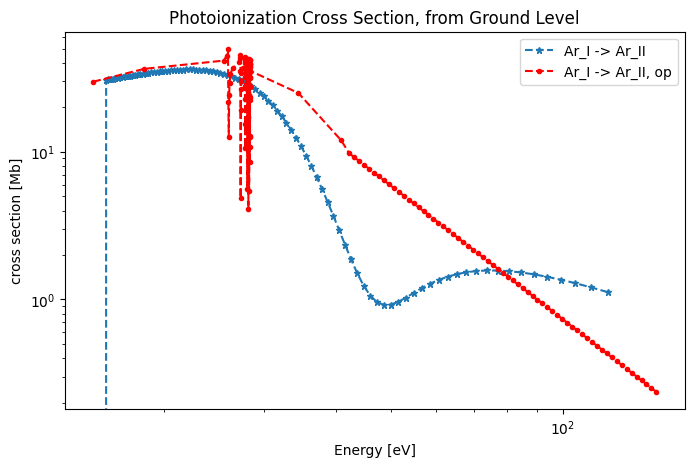

In [115]:
cross_sections = {}
# Atomic data for astrophysics. II. New analytic fits for photoionization cross sections of atoms and ions.
# D. A. Verner, G. J. Ferland, K. T. Korista, and D. G. Yakovlev, 1996, ApJ, 465, 487

w0 = (CST.h_ * CST.c_) / (15 * CST.eV2erg_) * 1E8  # [AA]

wave = np.linspace(w0/8,w0,101) * 1E-8
cross_sections["Ar_I -> Ar_II"] = (
    wave[:], 
    MakePhotoioniz.v1_photoioniz_cross_section_(wave[:],18,1),
    "*--",
    )


fig, ax = plt.subplots(1,1, figsize=(8,5), dpi=100)
for key, val in cross_sections.items():
    ax.plot( CST.h_ * CST.c_ / val[0] / CST.eV2erg_, val[1] * 1E18, val[2], markersize=5, label=key )
del key, val, wave

ax.plot( op_Ar_I[:,0] * CST.E_Rydberg_ / CST.eV2erg_, op_Ar_I[:,1], 'ro--', markersize=3, label="Ar_I -> Ar_II, op" )

ax.legend()
ax.set_title("Photoionization Cross Section, from Ground Level")
ax.set_xlabel("Energy [eV]")
ax.set_ylabel("cross section [Mb]")
ax.set_yscale("log")
ax.set_xscale("log")
plt.show()